In [67]:
import matplotlib.pyplot as plt
import matplotlib.dates
import pandas as pd
from Data.Featurisation import data_handeler
import scienceplots
plt.style.use("science")
source_data,_,_ = data_handeler(0, "era5", "nwp", "nwp")



Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset>inverter_rating] = inverter_rating


## Irradiance Plot

In [68]:
ghi = source_data["downward_surface_SW_flux"]
dni = source_data["direct_surface_SW_flux"]
dhi = source_data["diffuse_surface_SW_flux"]
gti = source_data["PoA"]

summer_day = pd.date_range("2018-08-07", "2018-08-07 23:00", tz="UTC", freq='h')
winter_day = pd.date_range("2018-12-01", "2018-12-01 23:00", tz="UTC", freq='h')



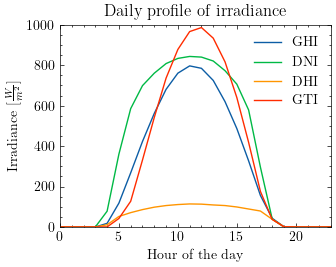

In [69]:
hours = source_data.loc[summer_day].index.hour
plt.figure()
plt.plot(hours,ghi.loc[summer_day], label="GHI")
plt.plot(hours,dni.loc[summer_day], label="DNI")
plt.plot(hours,dhi.loc[summer_day], label="DHI")
plt.plot(hours,gti.loc[summer_day], label="GTI")
plt.legend()
# plt.xticks(hours, [f'{hour}:00' for hour in hours], rotation=45)
plt.xlabel("Hour of the day")
plt.ylabel(r"Irradiance [$\frac{W}{m^2}$]")
plt.title("Daily profile of irradiance")
plt.xlim([0,23])
plt.ylim([0,1000])
plt.savefig("Figures/irradiance_summer", dpi=200)
plt.show()

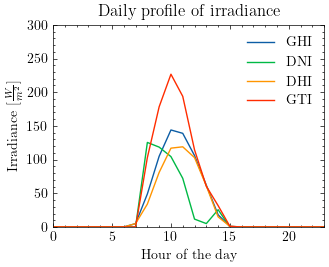

In [70]:
hours = source_data.loc[winter_day].index.hour
plt.figure()
plt.plot(hours,ghi.loc[winter_day], label="GHI")
plt.plot(hours,dni.loc[winter_day], label="DNI")
plt.plot(hours,dhi.loc[winter_day], label="DHI")
plt.plot(hours,gti.loc[winter_day], label="GTI")
plt.legend()
# plt.xticks(hours, [f'{hour}:00' for hour in hours], rotation=45)
plt.xlabel("Hour of the day")
plt.title("Daily profile of irradiance")

plt.xlim([0,23])
plt.ylim([0,300])
plt.ylabel(r"Irradiance [$\frac{W}{m^2}$]")
plt.savefig("Figures/irradiance_winter", dpi=200)
plt.show()

## IS DAY

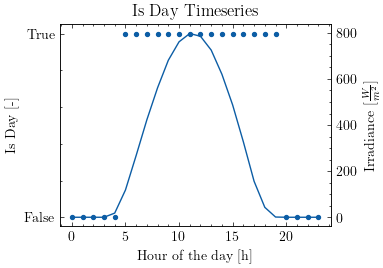

In [71]:
is_day = source_data["is_day"]
fig, ax1 = plt.subplots()
ax1.scatter(hours,is_day.loc[summer_day], s=8)
plt.title("Is Day Timeseries")
ax1.set_xlabel("Hour of the day [h]")
ax1.set_ylabel("Is Day [-]")
ax1.set_yticks([0,1], ["False", "True"])

ax2 = ax1.twinx()
ax2.plot(hours,ghi.loc[summer_day])
ax2.set_ylabel(r"Irradiance [$\frac{W}{m^2}$]")
plt.savefig("Figures/is_day", dpi=200)
plt.show()


In [74]:
power = source_data['P']
abs(power[~is_day.astype(bool)]).sum()

0.0